# Data Definition

* **hotel**: Type of hotel (Categorical)
* **is_canceled**: Whether the booking was canceled or not (Binary)
* **lead_time**: Number of days between booking date and arrival date (Numeric)
* **arrival_date_year**: The year of the arrival date (Numeric)
* **arrival_date_month**: The month of the arrival date (Categorical)
* **arrival_date_week_number**: The week number of the arrival date (Numeric)
* **arrival_date_day_of_month**: The day of the month of the arrival date (Numeric)
* **stays_in_weekend_nights**: Number of weekend nights stayed or booked to stay at the hotel (Numeric)
* **stays_in_week_nights**: Number of week nights stayed or booked to stay at the hotel (Numeric)
* **adults, children, babies**: Number of guests categorized by age groups
* **adults** = Number of adults
* **children** = Number of children
* **babies** = Number infants

Booking Details:
* **meal**: Type(s) food option(s) included in booking package (Categorical)
* **country & market_segment & distribution_channel** columns provide demographic and customer classification information.
* **is_repeated_guest** column specifies whether a guest is a repeated visitor or not.
* **previous_cancellations** column indicates how many previous bookings were canceled by a guest.
* **previous_bookings_not_canceled** shows how many previous bookings were not canceled by a guest.

Accommodation Details:
* **reserved_room_type** column indicates which type room was originally reserved for each booking.
* **assigned_room_type** mentions which type room was finally assigned for each booking.
* **booking_changes**: Number of changes made to the booking before arrival.
* **deposit_type**: Type of deposit made for the booking (Categorical).
* **agent & company** columns provide relevant information about the travel agency and/or company involved in making the reservation.
* **required_car_parking_spaces**: The number of car parking spaces required by guests for a specific hotel booking.
* **total_of_special_requests**: Total special requests submitted by guests for hotel bookings, covering a wide range of additional needs and preferences.

Additional Information:
* **days_in_waiting_list**: Number of days the booking was on a waiting list before it was confirmed or canceled.
* **customer_type** provides information on types of customers (Categorical)\
Transient: Pelanggan yang tidak termasuk dalam kelompok atau kontrak tetap. Mereka biasanya membuat pemesanan sendiri dan memiliki tingkat fleksibilitas yang tinggi.\
Contract: Pelanggan yang terkait dengan kontrak atau perjanjian jangka panjang dengan hotel. Biasanya mereka memiliki perjanjian tetap untuk pemesanan dengan harga yang ditetapkan di awal.\
Transient-Party: Kombinasi antara pelanggan transient dan kelompok. Mereka melakukan pemesanan secara individual tetapi dalam jumlah yang lebih besar atau untuk keperluan kelompok.\
Group: Pelanggan yang membuat pemesanan sebagai bagian dari kelompok atau tur. Biasanya mereka membuat pemesanan dalam jumlah yang besar dan terkait dengan kegiatan atau acara tertentu.

* **adr:** Average daily rate per room, calculated by dividing the sum of all lodging transactions by the total number of staying nights (Numeric)

## Import Library and Data

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
pd.options.display.max_columns = None

In [220]:
PATH_DATA_RAW= '../Dataset/Raw/'
PATH_DATA_CLEAN = '../Dataset/Clean/'

In [221]:
df = joblib.load(PATH_DATA_CLEAN+'clean_data.pkl')

# Check General Info From Data

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81389 entries, 0 to 83292
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           81389 non-null  object        
 1   is_canceled                     81389 non-null  int64         
 2   lead_time                       81389 non-null  int64         
 3   arrival_date_year               81389 non-null  int64         
 4   arrival_date_month              81389 non-null  object        
 5   arrival_date_week_number        81389 non-null  int64         
 6   arrival_date_day_of_month       81389 non-null  int64         
 7   stays_in_weekend_nights         81389 non-null  int64         
 8   stays_in_week_nights            81389 non-null  int64         
 9   adults                          81389 non-null  int64         
 10  children                        81389 non-null  int32         
 11  ba

Terdapat 32 kolom dengan:
- 20 kolom bertipe data numerical
- 11 kolom bertipe data kategorical atau object
- 1 kolom bertipe data datetime atau tanggal

In [223]:
df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
27236,Protea Hotel Fire & Ice! by Marriott Cape Town...,0,151,2019,June,25,19,1,3,2,0,0,HB,CHE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient,162.0,0,3,Check-Out,2019-06-23,27237
73814,"Hotel Maria Cristina, San Sebastian San Sebast...",0,43,2018,July,28,3,2,2,2,0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,9,0,Transient,127.1,0,3,Check-Out,2018-07-07,73815
16050,Cape Town Marriott Hotel Crystal Towers Cape T...,1,65,2017,September,36,5,1,1,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1,0,Transient,62.0,0,0,Canceled,2017-07-25,16051


In [224]:
numerical = []
categorical = []
date_data = []
for i in df.columns:
    if (df[i].dtypes == 'float64') or (df[i].dtypes == 'int64') or (df[i].dtypes == 'int32'):
        numerical.append(i)
    elif (df[i].dtypes == 'object'):
        categorical.append(i)
    else:
        date_data.append(i)
print(numerical)
print(categorical)
print(date_data)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'bookingID']
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
['reservation_status_date']


# Statistika Deskriptif

In [225]:
df[numerical].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,bookingID
count,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000
mean,0.375223,105.243006,2018.161557,27.132585,15.786826,0.939832,2.525378,1.863876,0.100972,0.007962,0.026330,0.087100,0.124734,0.217106,75.531030,2.381845,103.653891,0.061360,0.570581,41646.139319
std,0.484183,106.963567,0.705913,13.578381,8.776389,0.996926,1.896194,0.475281,0.392028,0.100549,0.160117,0.870134,1.491666,0.631314,107.413906,17.954547,46.553918,0.244303,0.791504,24044.483997
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000,1.000000
25%,0.000000,19.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,71.100000,0.000000,0.000000,20820.000000
50%,0.000000,71.000000,2018.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,95.000000,0.000000,0.000000,41642.000000
75%,1.000000,162.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000,126.000000,0.000000,1.000000,62478.000000
max,1.000000,629.000000,2019.000000,53.000000,31.000000,16.000000,40.000000,4.000000,10.000000,10.000000,1.000000,26.000000,70.000000,16.000000,535.000000,391.000000,508.000000,8.000000,5.000000,83293.000000


In [226]:
def check_values(coloms):
    for i in coloms:
        print("*",i)
        print(df[i].value_counts())
        print('--------------------')

In [227]:
colom = ['is_canceled','arrival_date_year', 'is_repeated_guest', 'bookingID', 'is_repeated_guest',
         'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
         'total_of_special_requests', 'required_car_parking_spaces']
check_values(colom)

* is_canceled
0    50850
1    30539
Name: is_canceled, dtype: int64
--------------------
* arrival_date_year
2018    38708
2019    27915
2017    14766
Name: arrival_date_year, dtype: int64
--------------------
* is_repeated_guest
0    79246
1     2143
Name: is_repeated_guest, dtype: int64
--------------------
* bookingID
1        1
55535    1
55542    1
55541    1
55540    1
        ..
27748    1
27747    1
27746    1
27745    1
83293    1
Name: bookingID, Length: 81389, dtype: int64
--------------------
* is_repeated_guest
0    79246
1     2143
Name: is_repeated_guest, dtype: int64
--------------------
* previous_cancellations
0     77077
1      4026
2        72
3        45
24       35
11       27
26       22
25       18
6        16
4        13
19       12
5        12
14        7
13        7
Name: previous_cancellations, dtype: int64
--------------------
* previous_bookings_not_canceled
0     79206
1       923
2       375
3       194
4       131
      ...  
40        1
64        1
46 

* kolom is_canceled adalah target variabel yang akan diprediksi. Dari proporsinya terlihat lebih banyak pelanggan yang tidak melakukan pembatalan daripada pembatalan
* pelanggan paling banyak akan menginap di tahun 2018
* ternyata pelanggan yang repeat booking sangat sedikit yaitu sebanyak 2.477 dibandingkan yang tidak repeat yaitu sebanyak 80.188

In [228]:
df[categorical].describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,81389,81389,81389,81389,81389,81389,81389,81389,81389,81389,81389
unique,64,12,5,165,7,5,9,10,3,4,3
top,Renaissance New York Times Square Hotel New Yo...,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,1348,9472,62892,32809,38976,67429,58771,50963,71085,61096,50850


In [229]:
check_values(categorical)

* hotel
Renaissance New York Times Square Hotel New York, NY                           1348
Las Vegas Marriott Las Vegas, NV                                               1344
Sacramento Airport Natomas Courtyard Sacramento, CA                            1331
Crystal Cove, Barbados Barbados                                                1323
Protea Hotel by Marriott Midrand Midrand, South Africa                         1319
                                                                               ... 
W New York – Union Square New York, NY                                         1223
Sheraton Grand Rio Hotel & Resort Rio de Janeiro, Brazil                       1222
W New York – Times Square New York, NY                                         1221
African Pride Melrose Arch, Autograph Collection Johannesburg, South Africa    1220
Residence Inn Rio de Janeiro Barra da Tijuca Barra da Tijuca, Brazil           1220
Name: hotel, Length: 64, dtype: int64
--------------------
* arrival

* negara tempat reservasi terbanyak adalah negara portugal

In [230]:
df[date_data].describe()

C:\Users\ramad\AppData\Local\Temp\ipykernel_23724\3799866994.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[date_data].describe()


,reservation_status_date
count,81389
unique,913
top,2017-10-21 00:00:00
freq,1020
first,2017-01-01 00:00:00
last,2019-09-10 00:00:00


* tanggal orang mengubah status reservasi pada data ini diambil dari tanggal 2017-01-01 sampai 2019-09-10
* dalam rentang tersebut pelanggan paling banyak mengubah status reservasinya pada tanggal 2017-10-21 dengan total pelanggan yang merubah statusnya sebanyak 1024 orang

# Distribution Data

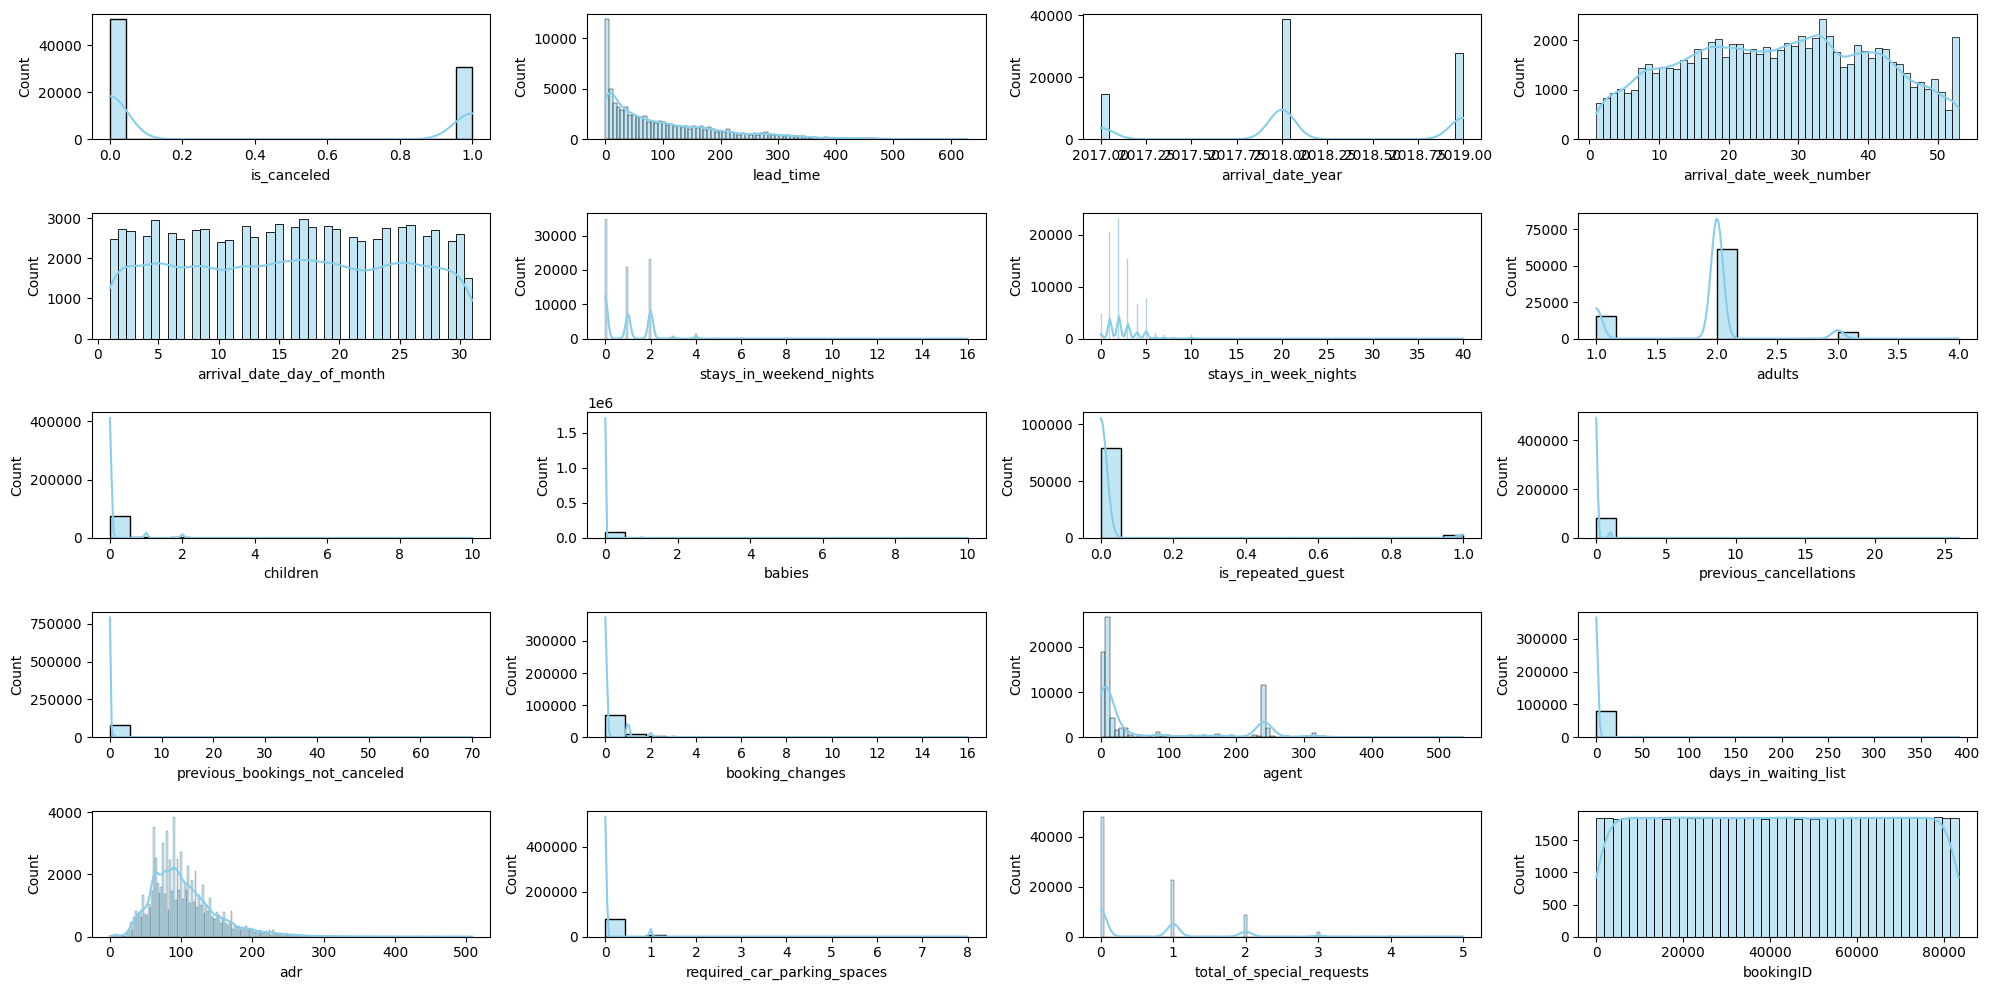

In [231]:
plt.figure(figsize=(20,10))

features = numerical
for i in range(0, len(features)):
    plt.subplot(5, 4, i+1)
    sns.histplot(x=df[features[i]], color='skyblue', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

* kebanyakan data numerical berdistribusi skew dan memiliki banuak outlier
* kolom bookingID bisa diabaikan karena merupakan kolom ID
* kolom arrival_date_... merupakan kolom tanggal yang dipisah-pisah/diestrak

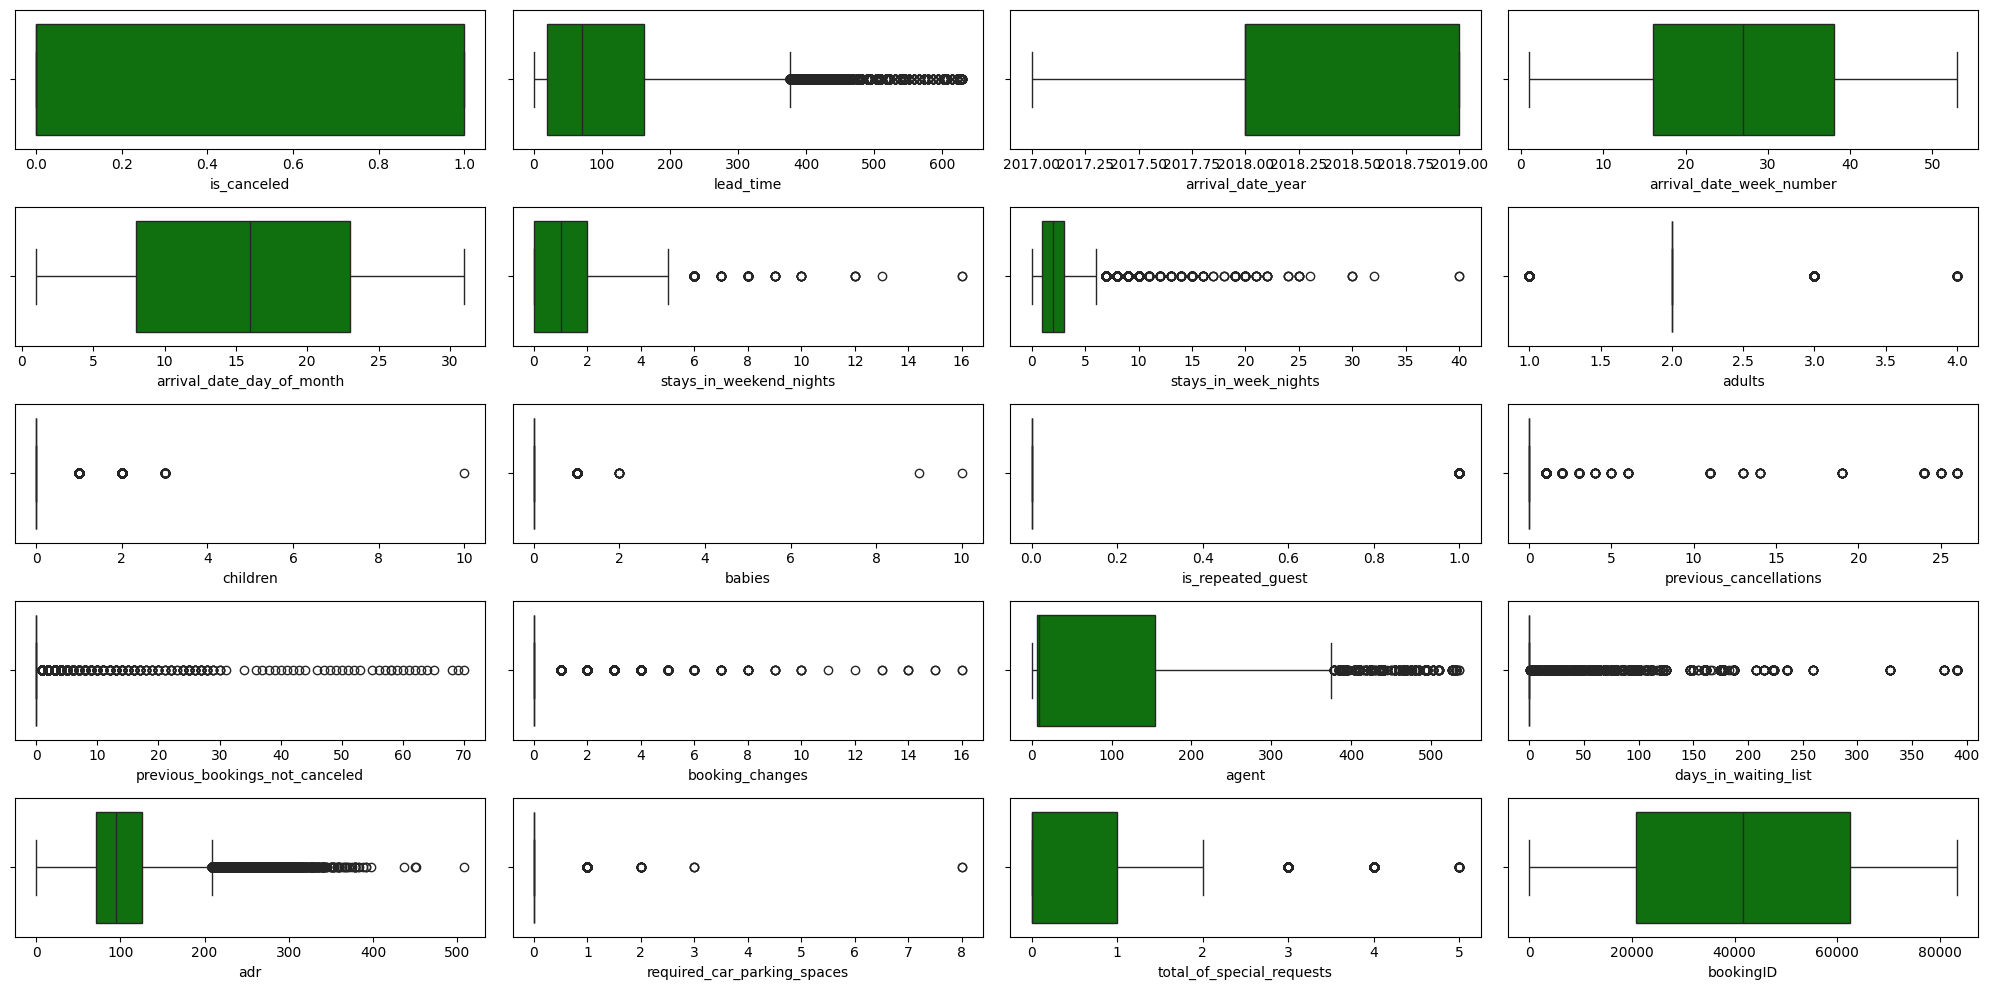

In [232]:
plt.figure(figsize=(20,10))

features = numerical
for i in range(0, len(features)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

* seperti yang terlihat pada histogram sebelumnya, sangat banyak outlier pada kolom numerical
* masa tunggu pelanggan (lead_time) paling banyak berkisar antara 15-180 hari
* sangat sedikit pelanggan yang membawa anak-anak dan bayi mereka jika dilihat dari boxplot children dan babies
* kebanyakan adr pelanggan berkisar antara 80-120
* sangat banyak pelanggan yang tidak meminta tempat parkir kendaraanya

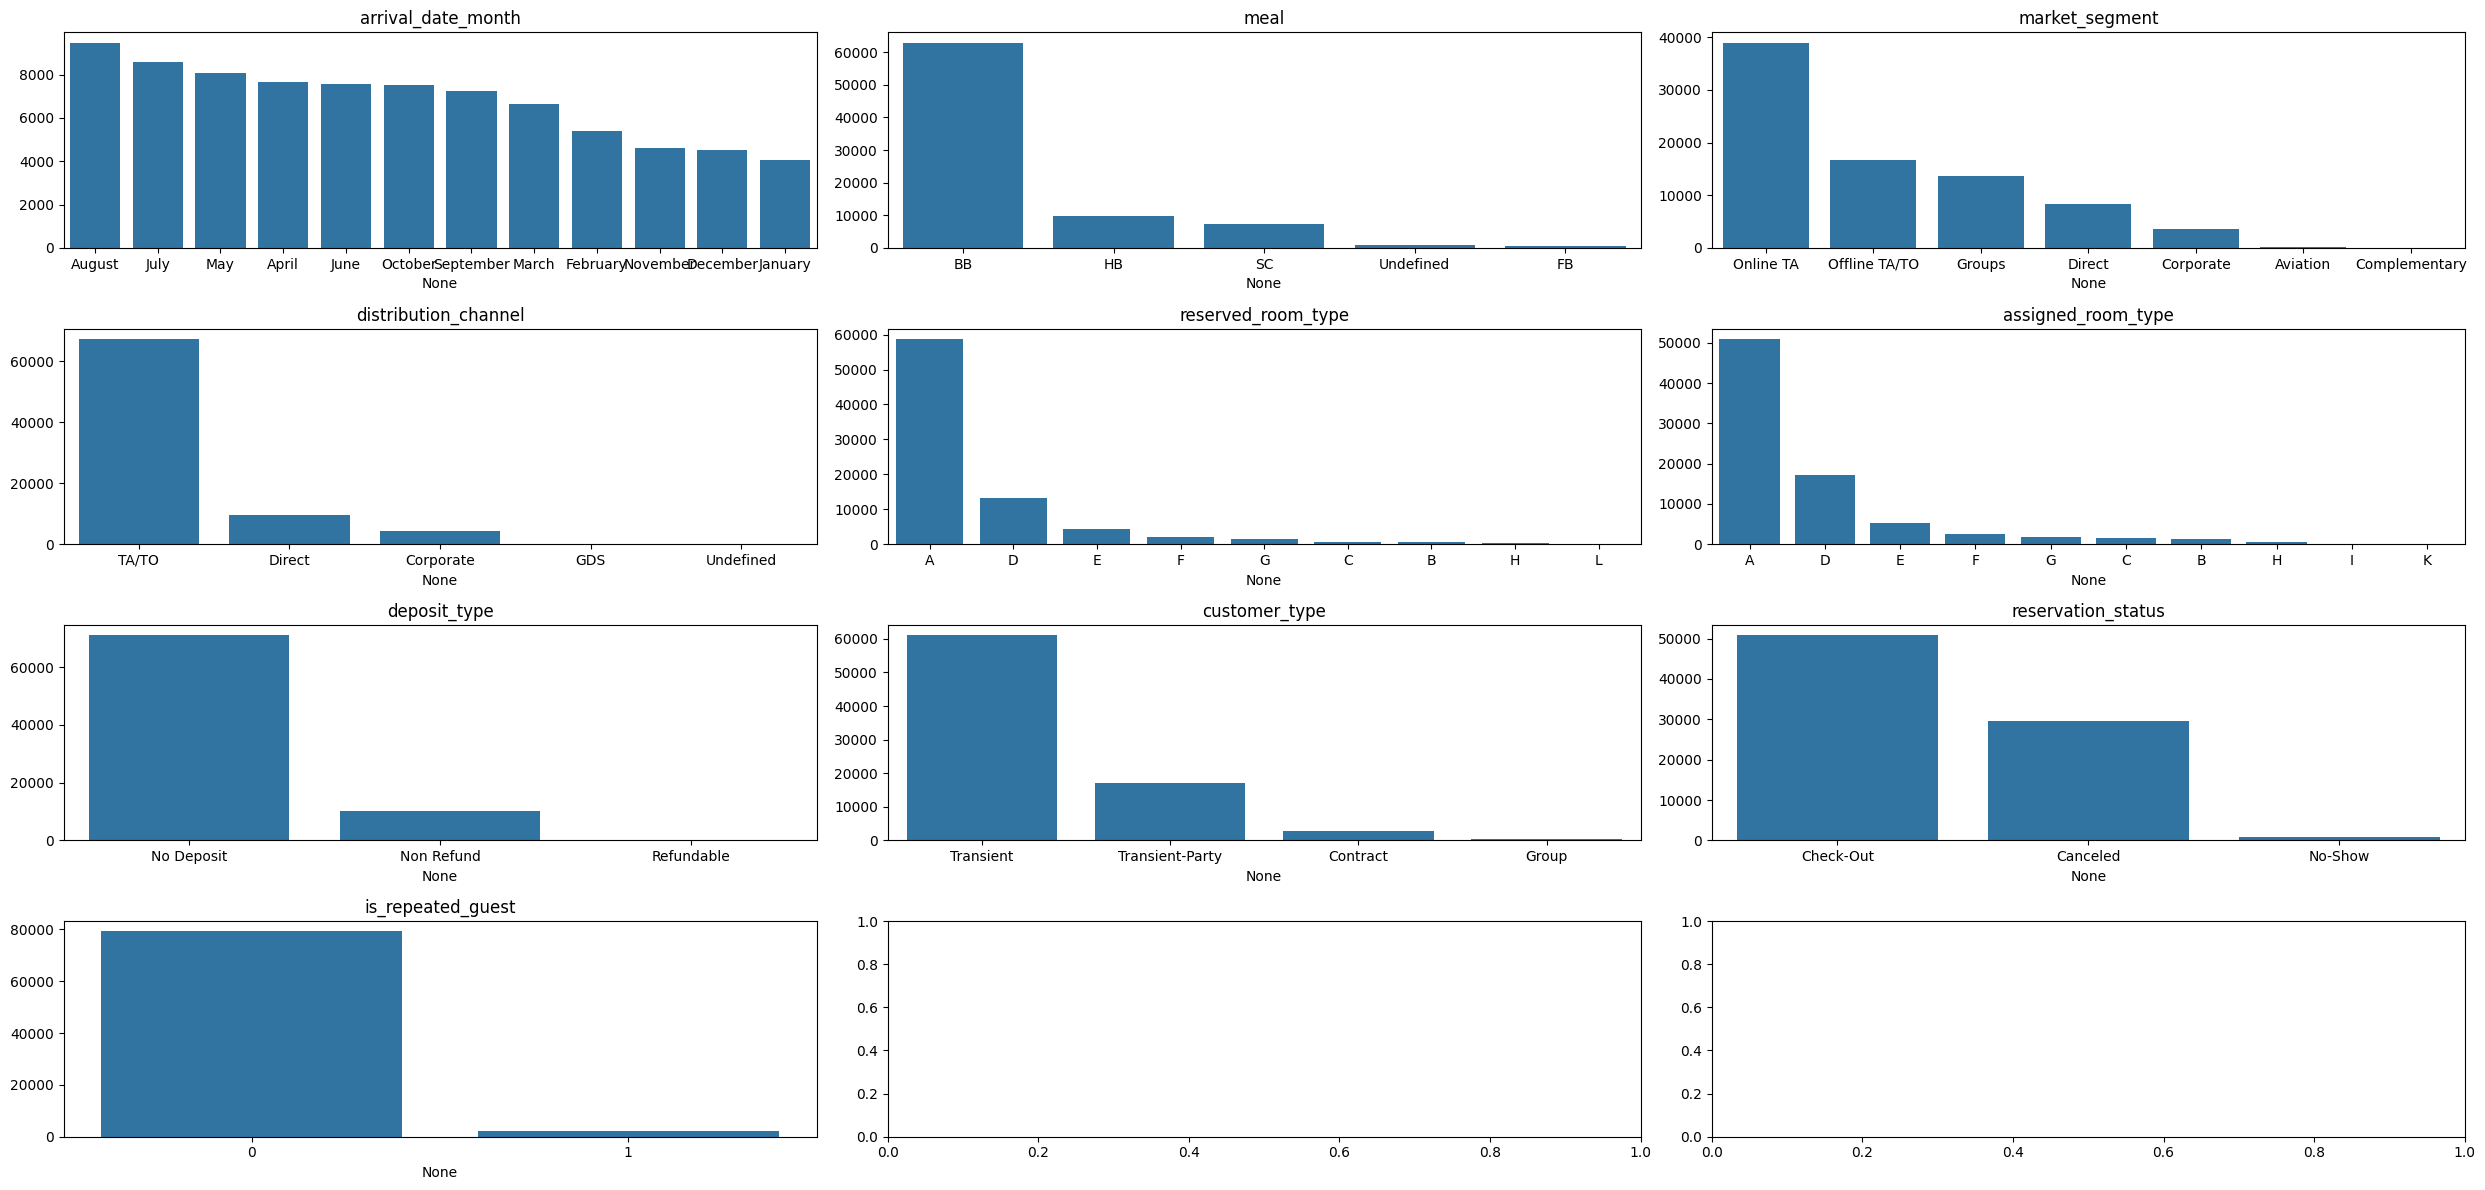

In [233]:
variabel = ['arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'is_repeated_guest']
total_category = len(variabel)
row = 4
colom = 3

fig, axes = plt.subplots(row, colom, figsize=(25, 12))
for i, ax in enumerate(axes.flat):
    if i < total_category:
        sns.barplot(x=df[variabel[i]].value_counts().index, y=df[variabel[i]].value_counts().values, ax=ax)
        ax.set_title(variabel[i])

plt.tight_layout()
plt.show()

* arrival_date_month paling tinggi terjadi pada bulan agustus.
* makanan yang paling banyak dipesan adalah BB (Breakfast).
* Kamar hotel yang paling banyak dipesan adalah untuk segmen Online Travel Agents (Online TA) dan Offline Travel Agents/Tour Operators (Offline TA/TO), dengan distribution channel (saluran distribusi) utamanya berasal dari Travel Agents/Tour Operators (TA/TO).
* reserved_room_type dan assigned_room_type yang paling banyak dipesan adalah room type A, maka itu menunjukkan bahwa room type A adalah yang paling diminati oleh pelanggan atau yang paling sering dipilih oleh sistem atau staf hotel saat pemesanan kamar.
* Metode deposit yang paling banyak digunakan oleh pelanggan adalah "tidak ada deposit" (no deposit), sementara hanya sedikit pelanggan yang menggunakan metode "non-refundable" dan "refundable".
* Tipe customer yang paling banyak memesan hotel adalah Transient. Tidak banyak tipe customer Transient-Party, Contract, dan Group yang memesan hotel daripada Transient.

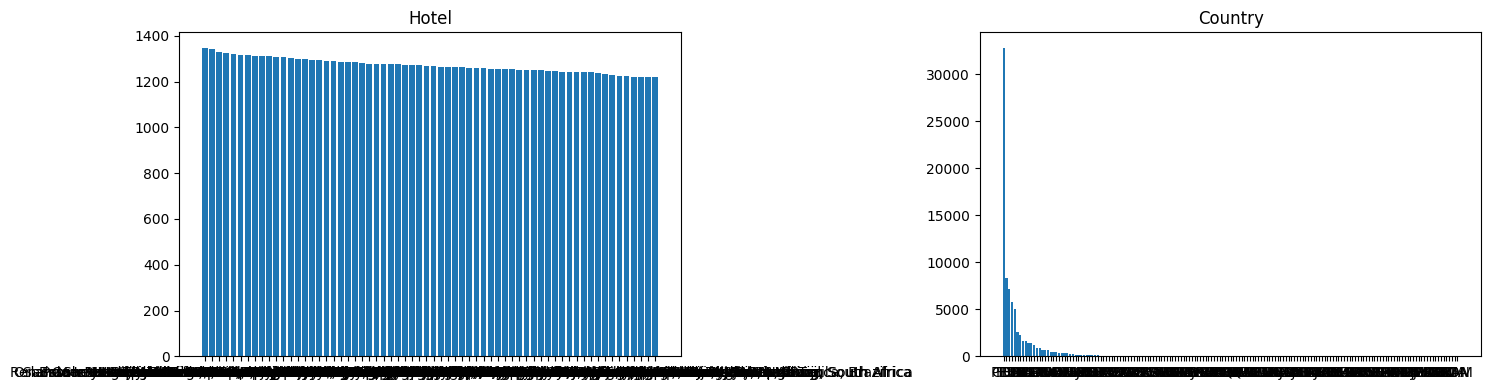

In [234]:
# Ukuran keseluruhan figure
plt.figure(figsize=(15, 4))

# Subplot 1
hotel = df['hotel'].value_counts().reset_index().sort_values('hotel', ascending = False)
plt.subplot(1, 2, 1)
ax1 = plt.bar(x=hotel['index'], height=hotel.hotel)
plt.title('Hotel')

# Subplot 2
country = df['country'].value_counts().reset_index().sort_values('country', ascending = False)
plt.subplot(1, 2, 2)
ax2 = plt.bar(x=country['index'], height=country.country)
plt.title('Country')

# Menampilkan semua subplot
plt.tight_layout()
plt.show()

# Mutivariate Analysis

In [235]:
from math import ceil
def stack_bar_chart(list_colom):
    if len(list_colom) <= 3:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
    else:
        fig, axes = plt.subplots(nrows=ceil(len(list_colom)/3), ncols=3, figsize=(17, 14))
    for i, column in enumerate(list_colom):
        if len(list_colom) <= 3:
            ax = pd.crosstab(df[column], df['is_canceled'], normalize='index').plot.barh(stacked=True, ax = axes[i])
        else:
            ax = pd.crosstab(df[column], df['is_canceled'], normalize='index').plot.barh(stacked=True, ax = axes[i // 3, i % 3])
        ax.legend(bbox_to_anchor=(0.5, 0.5), title='is_canceled', fontsize=10, title_fontsize=10, labels=['No', 'Yes'], loc='lower left')
        ax.legend().remove()

        j = 1
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.text(x+width/2, y+height/2, '{:.1f} %'.format(width*100),  # Perhatikan perubahan di sini
                    horizontalalignment='center', verticalalignment='center',
                    color='white', fontsize=8, weight='bold')
            j += 1

        ax.set_title(f'Cancelation Rate by {column}', fontsize=12, pad=10)
        ax.set_xlabel('Percentage (%)', fontsize=10, labelpad=5)  # Perhatikan perubahan di sini
        ax.set_ylabel(column, fontsize=10)

    plt.tight_layout()
    plt.show()

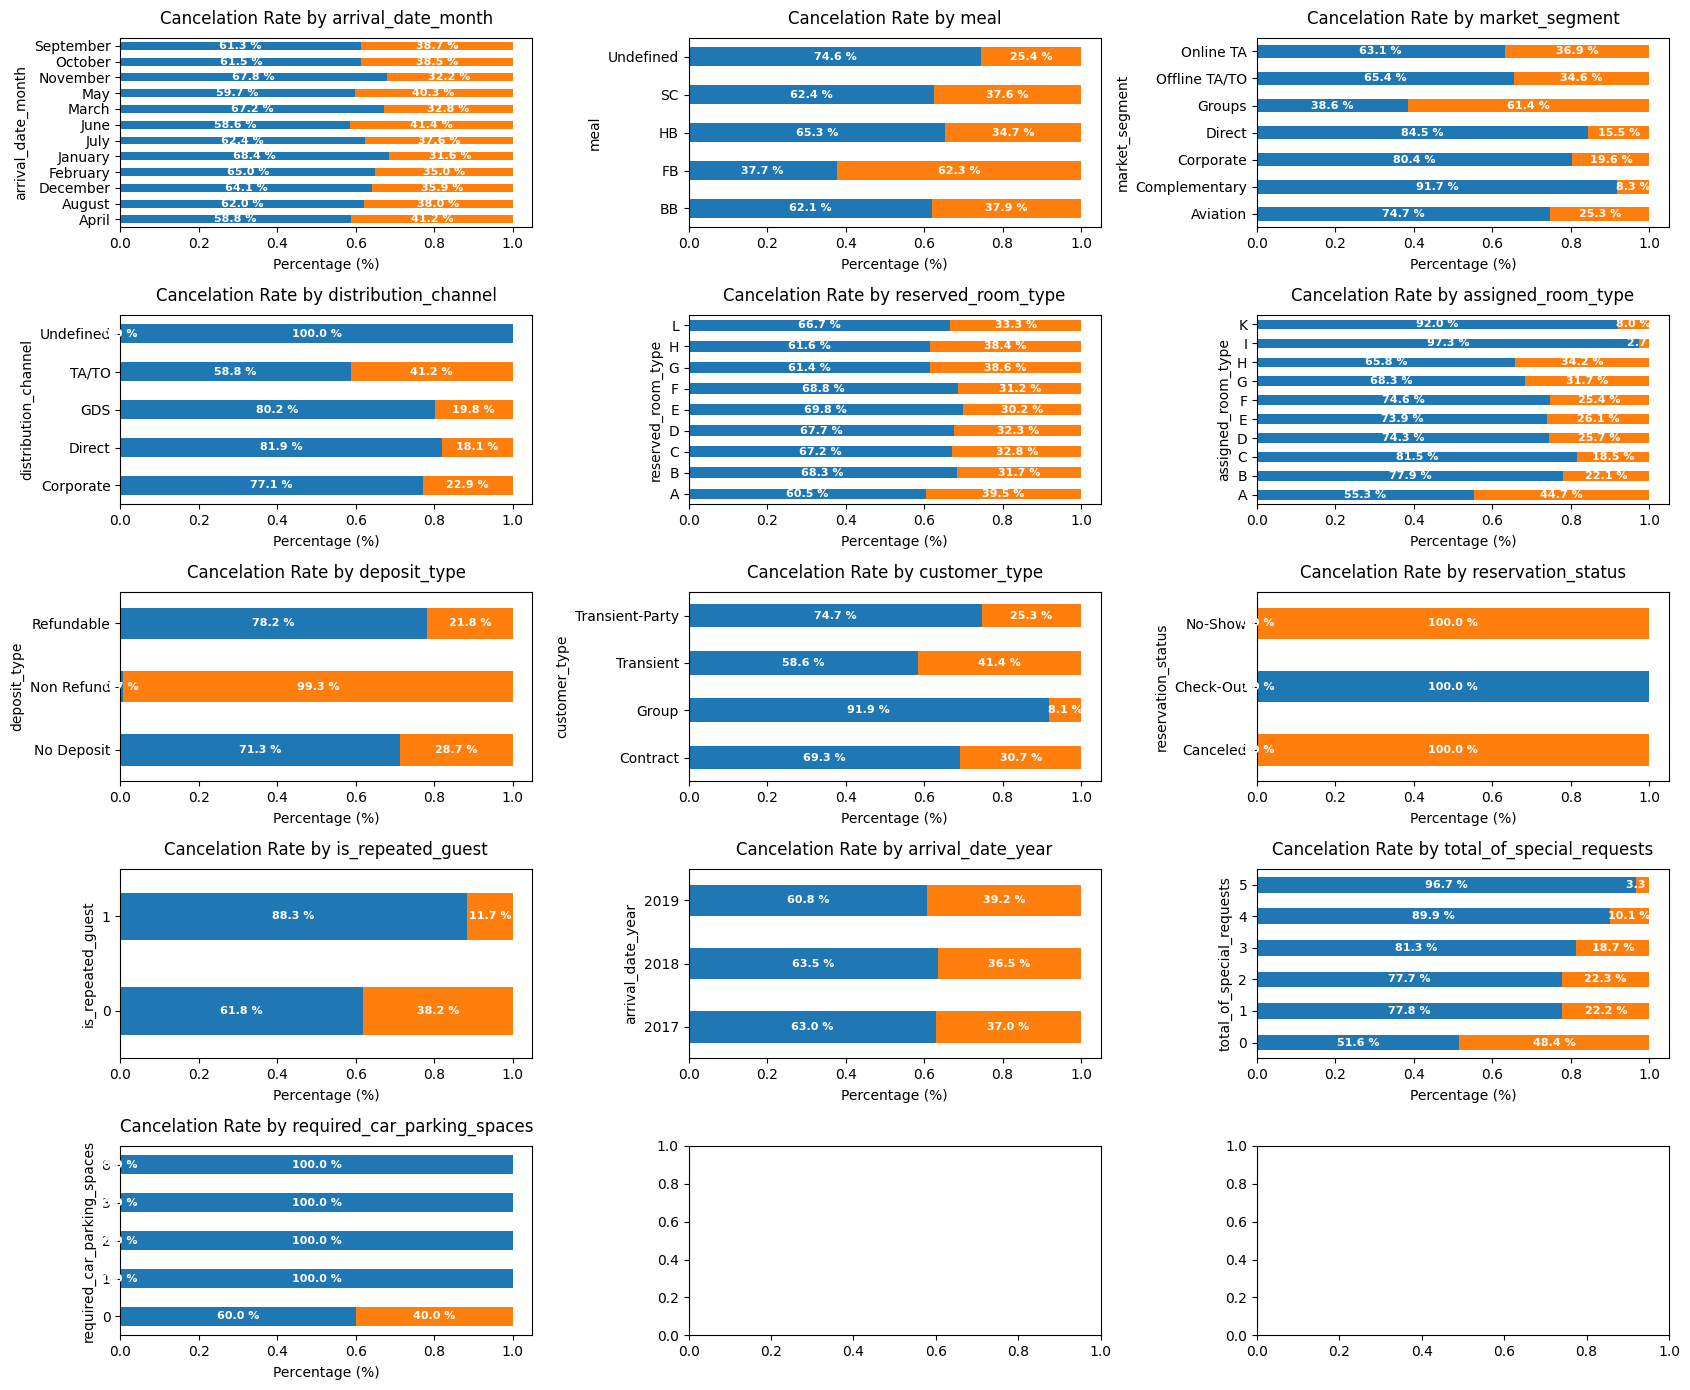

In [236]:
columns_to_plot = ['arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type',
                    'reservation_status', 'is_repeated_guest', 'arrival_date_year', 'total_of_special_requests', 'required_car_parking_spaces']
stack_bar_chart(columns_to_plot)

#### Booking Details:
* pada kolom meal terlihat rate cancelation tertinggi ada pada orang yang memesan FB (Full Board) daripada makanan lain. Namun, karena yang memesan FB ini sangat sedikit sehingga kita tidak bisa mengindikasikan bahwa orang yang memesan makanan FB pada booking hotelnya akan membatalkan pesanannya. Jika dilihat dari makanan lain rate cancallation tidak jauh berbeda satu sama lain.
* pada market segment sepertinya pada market segment group memiliki rate cancelation yang tinggi yaitu 61%. Lebih dari setengah pelanggan yang memesan hotel di market segmen tersebut kemudian membatalkan pemesanannya. ini bisa menjadi indikasi bahwa terdapat tantangan atau isu tertentu yang mempengaruhi pelanggan dalam segmen tersebut untuk membatalkan pemesanan hotel mereka.
* walaupun hanya sedikit pelanggan yang berulang ternyata rate cancelationnya jauh lebih sedikit dari pada orang baru dalam memesan hotelnya yaitu hanya 11%. Lebih dari 1/3 yang tidak repeat atau baru dalam memesan hotelnya membatalkan pemesanannya yaitu sebesar 38.2%. Hal ini menunjukkan bahwa pelanggan yang berulang cenderung lebih stabil dan konsisten dalam keputusan pemesanan mereka.

#### Accommodation Details:
* pada kolom reserved_room_type tingkat pembatalan semua kamar hampir sama untuk semua kamar yaitu berkisar 30%. Sedangkan pada kolom assigned_room_type tingkat pembatalan cukup mencolok antar kamarnya. Tingkat pembatalan tertinggi ada pada kamar tipe A yang mencapai 44.7%, padahal kamar tipe ini adalah kamar yang paling banyak dipesan. Kamar-kamar lain tingkat pembatalannya kurang dari 30%.
* pada deposite type yang disediakan hotel, tingkat pembatalan relatif kecil pada pelanggan yang tidak deposit dan deposit dengan jenis deposit refundable. Sedangkan dengan jenis deposit Non refund tingkat pembatalan mencapai 99.3%
* terlihat semakin banyak pelanggan yang meminta special request maka akan semakin rendah juga tingkat pembatalannya. pelanggan yang tidak meminta special request memiliki tingkat pembatalan sebesar 48.4%, sedangkan jika ada permintaan tingkat pembatalan kurang dari 25%. Hal ini menunjukkan bahwa pelanggan cenderung lebih puas dan lebih mungkin untuk tetap melanjutkan pemesanan mereka jika permintaan khusus mereka terpenuhi.
* para pelanggan yang tidak meminta parkir kendaraan memiliki tingkat pembatalan cukup tinggi yaitu 40% dibandingkan pelanggan yang meminta parkir kendaraan yang tingkat pembatalannya 0%. Ini menunjukkan bahwa ketersediaan fasilitas parkir kendaraan dapat memengaruhi keputusan pembatalan pelanggan.

#### General Information:
* pada arrival_date_month tingkat pembatalan hampir seragam untuk setiap bulannya yaitu berkisar 30-40% pada masing-masing bulan, sehingga ini mengindikasikan bahwa pelanggan tidak terlalu memperhatikan bulan apa mereka akan menginap. Begitu pula dengan arrival_date_year yang memiliki tingkat pembatalan cukup seragam tiap tahunnya.
* customer_type Transient memiliki tingkat pembatalan yang cukup tinggi yaitu sebesar 41.4%.
* pada reservation_status sepertinya ini adalah redundant dari kolom is_canceled karena sudah jelas jika status reservasinya canceled berarti pelanggan tersebut sudah dipastikan membatalkan pemesanannya, jika sudah check out berarti pelanggan sudah habis waktu menginapnya. dari chartnya juga terlihat jelas check out tingkat pembataln 0% dan canceled tingkat pembatalan sebesar 100%. kategori no show ini sudah pasti membatalkan pesanannya karena tingkat pembatalannya adalah 100% juga. Kolom ini akan dihapus untuk pemodelan nantinya

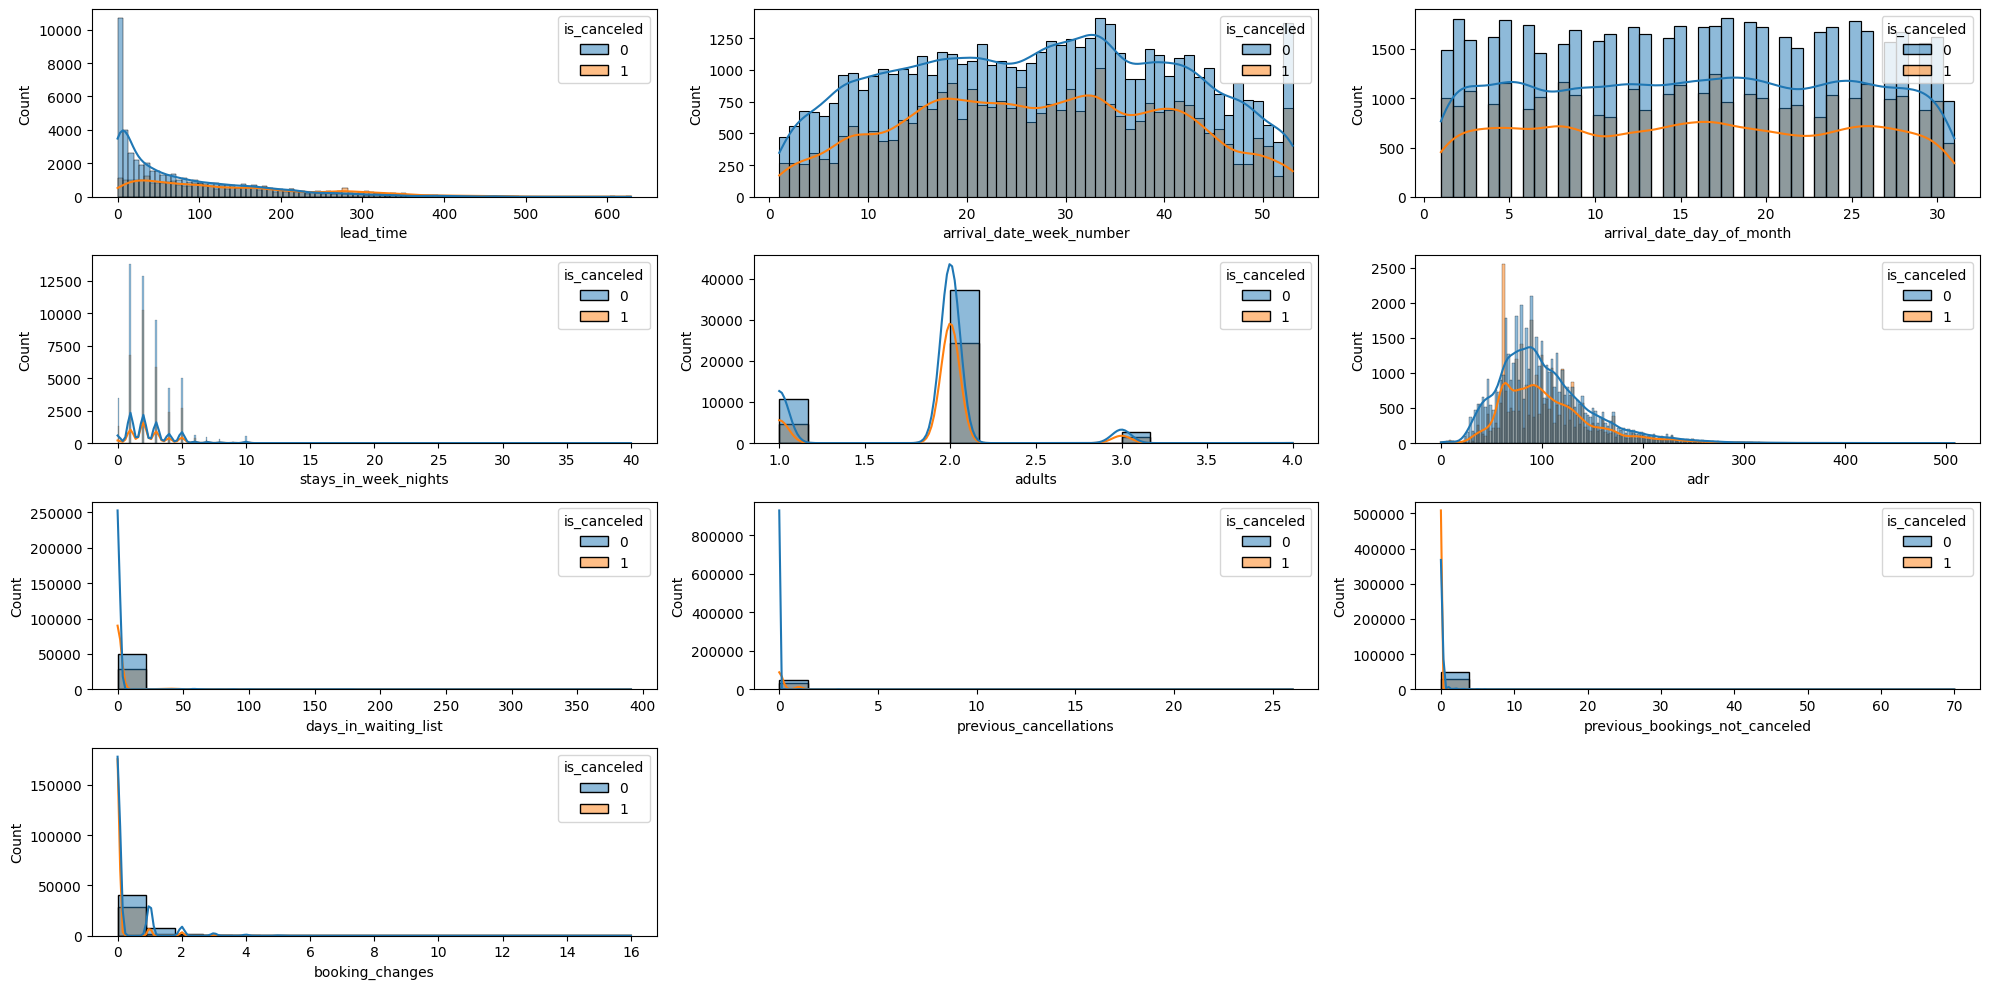

In [237]:
columns_to_plot_numerical = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 
                             'stays_in_week_nights', 'adults', 'adr', 'days_in_waiting_list',
                             'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']

plt.figure(figsize=(20,10))

features = columns_to_plot_numerical
for i in range(0, len(features)):
    plt.subplot(4, 3, i+1)
    sns.histplot(x=df[features[i]], color='skyblue', hue=df['is_canceled'], kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

* pada kolom arrival_date_week_number terlihat ada beberapa minggu dimana tingkat pembatalan pesanan cukup tinggi dan ada beberapa minggu tingkat pembatalan pesanan juga rendah. Hal itu pun juga berlaku pada kolom arrival_date_day_of_month
* kolom-kolom lain akan dilihat dengan boxplot dan tabel groupby agar lebih jelas

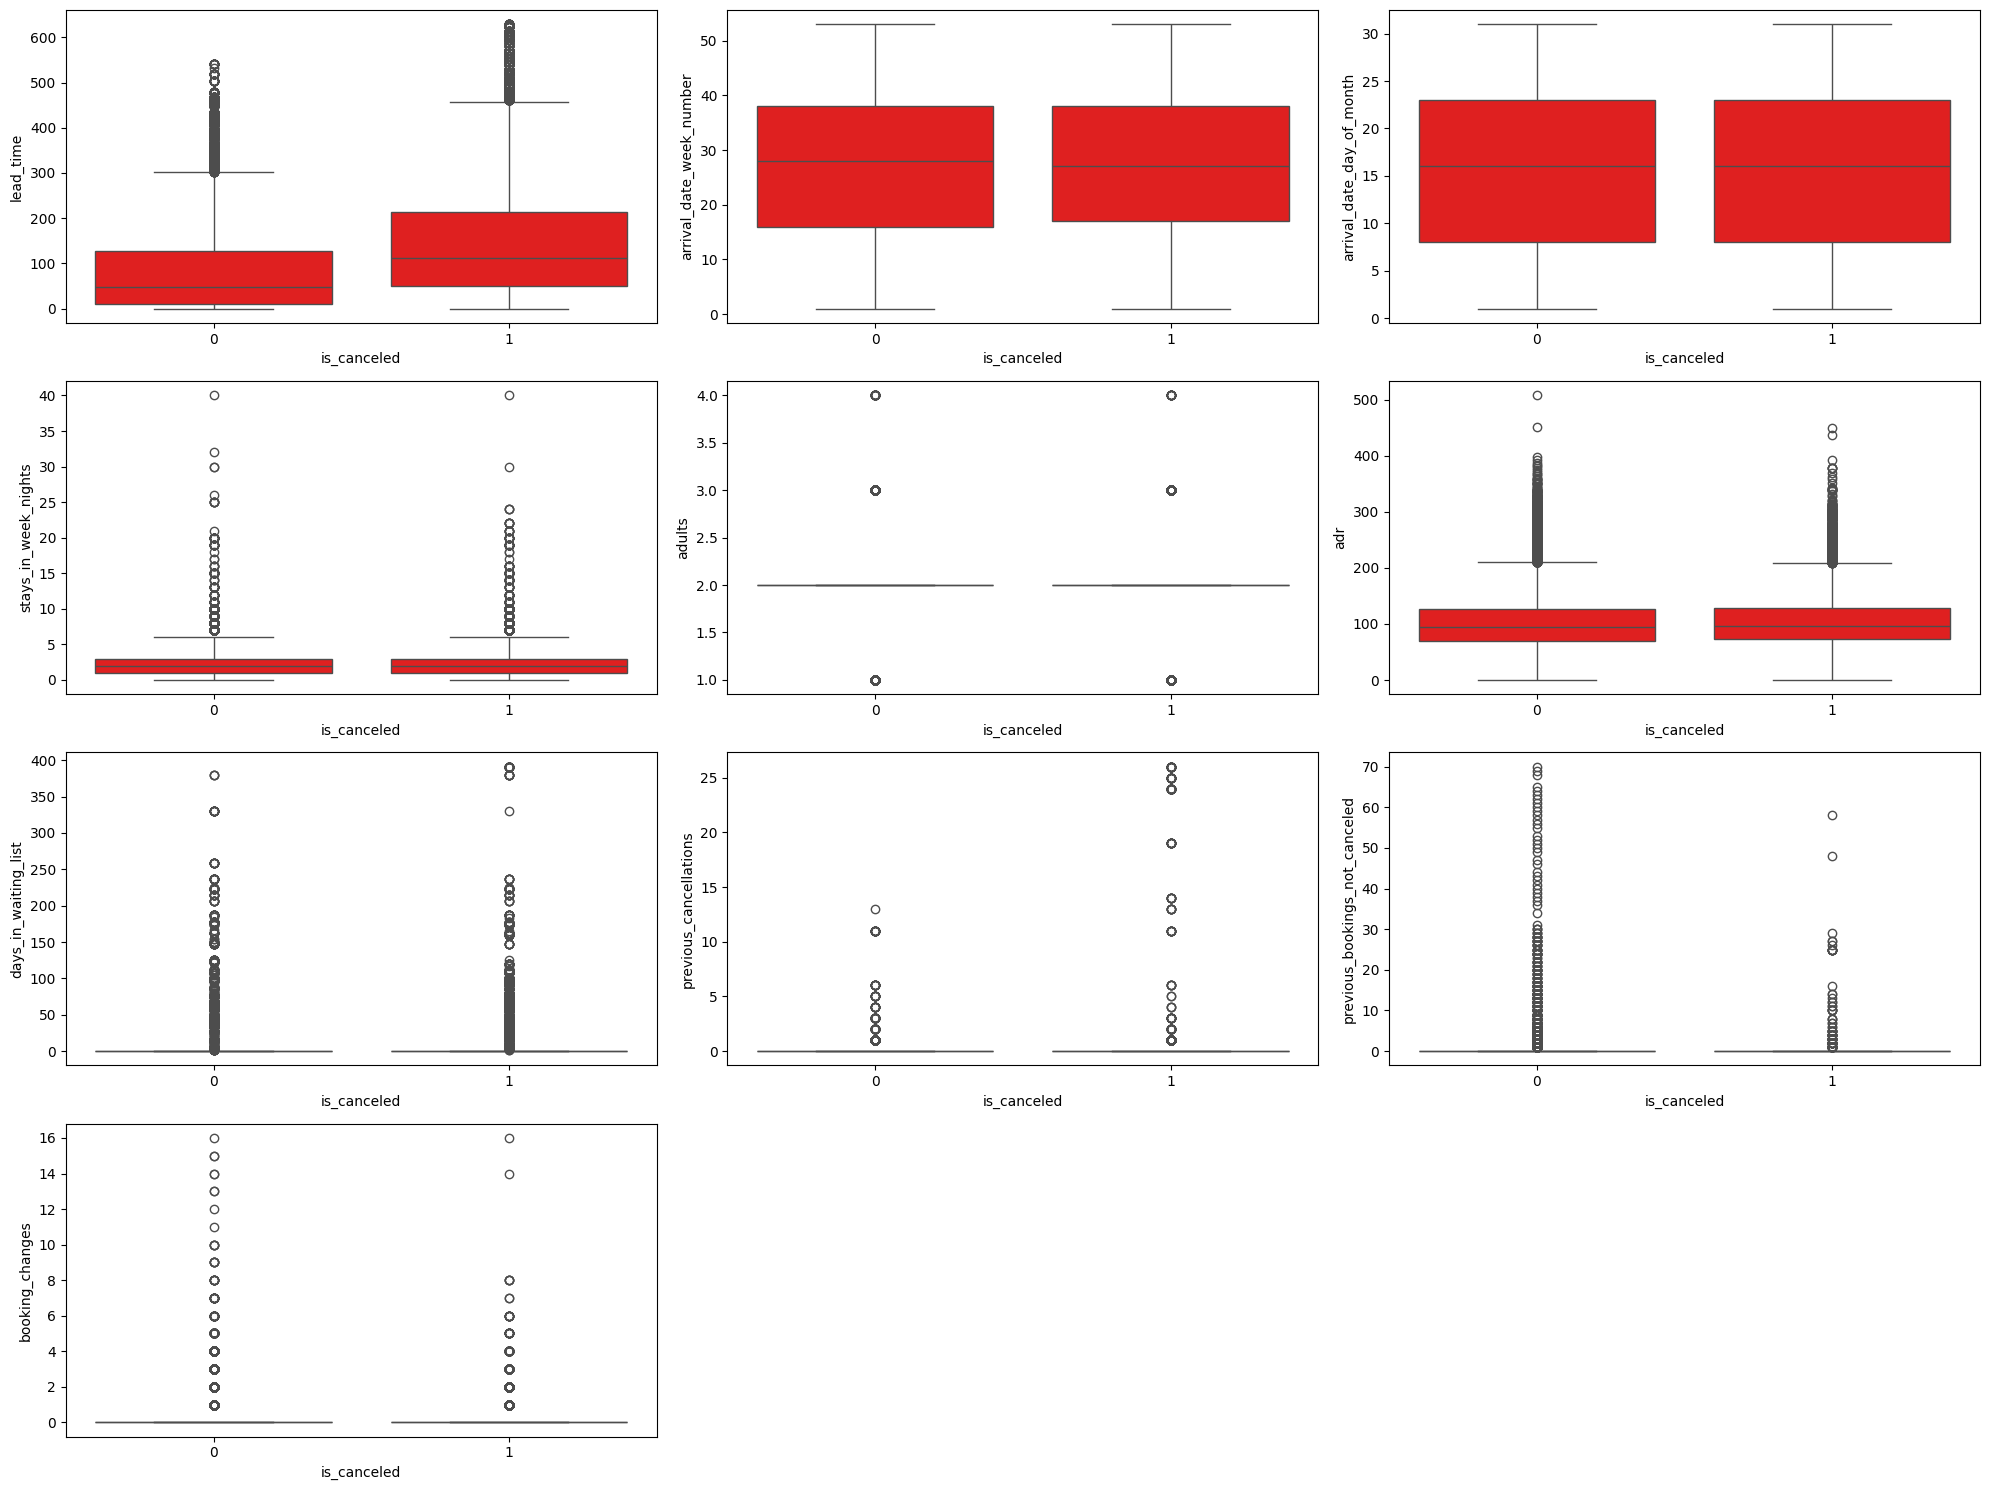

In [238]:
plt.figure(figsize=(20,15))

features = columns_to_plot_numerical
for i in range(0, len(features)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x = df['is_canceled'], y=df[features[i]], color='red')
    plt.tight_layout()

In [239]:
df.groupby('is_canceled').mean()[['lead_time','adults','children','adr','booking_changes','previous_bookings_not_canceled','previous_cancellations','days_in_waiting_list']]

C:\Users\ramad\AppData\Local\Temp\ipykernel_23724\226238248.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('is_canceled').mean()[['lead_time','adults','children','adr','booking_changes','previous_bookings_not_canceled','previous_cancellations','days_in_waiting_list']]


,lead_time,adults,children,adr,booking_changes,previous_bookings_not_canceled,previous_cancellations,days_in_waiting_list
is_canceled,,,,,,,,
0,81.457168,1.843854,0.099331,102.713924,0.287394,0.183815,0.014926,1.622006
1,144.848423,1.897213,0.103703,105.219014,0.100069,0.026360,0.207276,3.647041


* lead_time lebih tinggi pada pelanggan yang membatalkan, dan hal ini sejalan dengan days_in_waiting_list yang lebih tinggi pada pelanggan yang membatalkan, maka ini menunjukkan bahwa pelanggan yang harus menunggu lebih lama untuk mendapatkan konfirmasi pesanan mereka cenderung lebih mungkin untuk membatalkan pesanan mereka.
* pada kolom booking_changes terlihat pelanggan yang membatalkan pesanan memiliki rata-rata booking changes lebih rendah daripada pelanggan yang tidak membatalkan. Hal ini bisa terjadi karena pelanggan yang tidak membatalkan mungkin lebih sering melakukan perubahan karena mereka masih mempertimbangkan opsi atau memiliki kebutuhan yang lebih dinamis.
* pada kolom adults, children, dan adr sepertinya tidak perbedaan signifikan antara pelanggan yang membatalkan pesanan maupun yang tidak membatalkan pesanannya
* pelanggan yang memiliki riwayat cancelation yang tinggu juga cenderung untuk melakukan pembatalan pemesanan lagi, dan juga sebaliknya.

# Add some feature

### is_children, dan is_baby, is_required_park, is_special_requests

In [242]:
df['is_children'] = (df['children'] + df['babies'] > 0).astype(int)
df['is_required_park'] = (df['required_car_parking_spaces']>0).astype(int)
df['is_special_requests'] = (df['total_of_special_requests']>0).astype(int)

In [243]:
new_columns = ['is_children','is_required_park','is_special_requests']
check_values(new_columns)

* is_children
0    75140
1     6249
Name: is_children, dtype: int64
--------------------
* is_required_park
0    76435
1     4954
Name: is_required_park, dtype: int64
--------------------
* is_special_requests
0    47931
1    33458
Name: is_special_requests, dtype: int64
--------------------


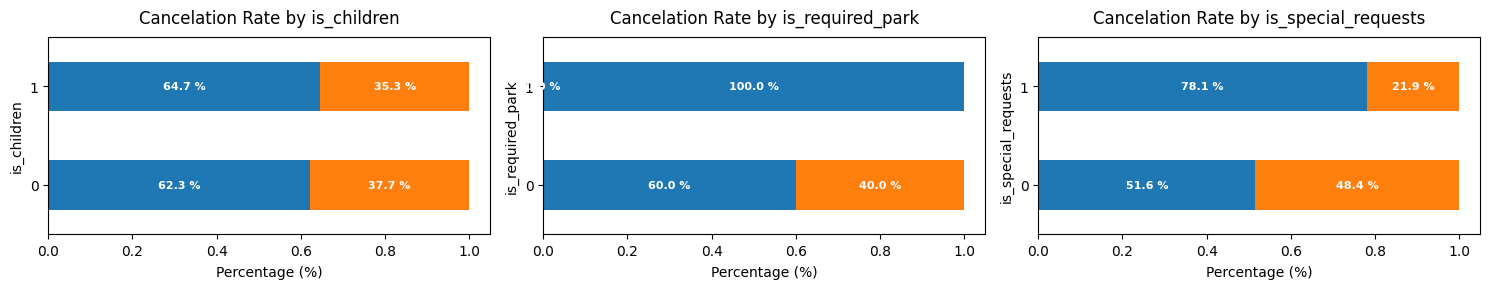

In [244]:
columns_to_plot = ['is_children','is_required_park','is_special_requests']
stack_bar_chart(columns_to_plot)

* terlihat bahwa orang-orang yang membawa anak tidak mempengaruhi signifikan orang-orang dalam melakukan pembatalan pemesanan hotel karena memiliki tingkat pembatalan yang relatif sama
* seperti pada penjelasan sebelumnya pelanggan yang meminta akomodasi berupa tempat parkir atau special request cenderung untuk tidak membantalkan pemesanannya.

### total_stays, total_guests, total_kids

In [245]:
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [248]:
df.groupby('is_canceled').mean()[['total_stays', 'total_bookings', 'total_guests']]

C:\Users\ramad\AppData\Local\Temp\ipykernel_23724\2901585356.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('is_canceled').mean()[['total_stays', 'total_bookings', 'total_guests']]


,total_stays,total_bookings,total_guests
is_canceled,,,
0,3.441082,0.198741,1.953746
1,3.505387,0.233636,2.004552


### historis rate succesfull bookings

In [247]:
# Menghitung total pemesanan
df['total_bookings'] = df['previous_bookings_not_canceled'] + df['previous_cancellations']
# Menghitung tingkat keberhasilan pemesanan
df['successful_rate_bookings'] = df['previous_bookings_not_canceled'] / df['total_bookings']
# Menginisialisasi bobot untuk pelanggan baru
df.loc[df['total_bookings'] == 0, 'successful_rate_bookings'] = -1  

<AxesSubplot: xlabel='successful_rate_bookings', ylabel='Count'>

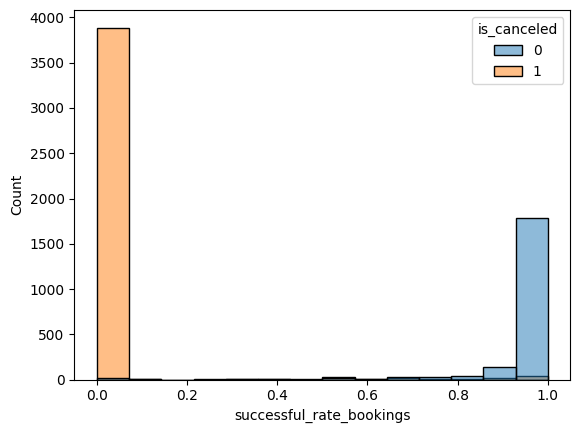

In [249]:
ever_bookings = df[df['successful_rate_bookings'] != -1]
sns.histplot(x=ever_bookings['successful_rate_bookings'], color='skyblue', hue=ever_bookings['is_canceled'])

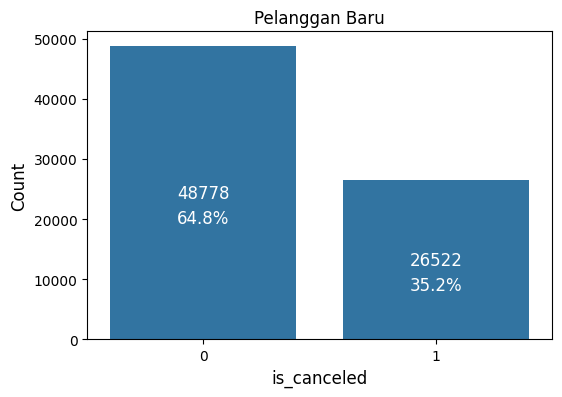

In [250]:
never_bookings = df[df['successful_rate_bookings'] == -1]
# Menghitung jumlah data dan persentase untuk setiap kategori
total_data = len(never_bookings)
cancel_counts = never_bookings['is_canceled'].value_counts()
cancel_percentages = cancel_counts / total_data * 100

# Membuat bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=cancel_counts.index, y=cancel_counts.values)

# Menambahkan anotasi di dalam bar
for i, count in enumerate(cancel_counts):
    plt.text(i, count/2, str(count), ha='center', va='center', fontsize=12, color='white')
    plt.text(i, (count/2)-5000, f'{cancel_percentages[i]:.1f}%', ha='center', fontsize=12, color='white')

# Memberi label sumbu
plt.title('Pelanggan Baru')
plt.xlabel('is_canceled', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Menampilkan grafik
plt.show()

### ever_canceled, ever_succes, new_customer, ever_changes_booking

In [251]:
# Menghitung apakah pelanggan pernah berhasil atau tidak
df['ever_success'] = (df['previous_bookings_not_canceled'] > 0).astype(int)

# Menghitung apakah pelanggan pernah gagal atau tidak
df['ever_canceled'] = (df['previous_cancellations'] > 0).astype(int)

# Menghitung apakah pelanggan pernah melakukan perubahan pemesanan
df['ever_changes_booking'] = (df['booking_changes'] > 0).astype(int)

# Menghitung new customer
df['new_customer'] = (df['successful_rate_bookings'] == -1).astype(int)

In [252]:
new_columns = ['ever_success','ever_canceled','new_customer','ever_changes_booking']
check_values(new_columns)

* ever_success
0    79206
1     2183
Name: ever_success, dtype: int64
--------------------
* ever_canceled
0    77077
1     4312
Name: ever_canceled, dtype: int64
--------------------
* new_customer
1    75300
0     6089
Name: new_customer, dtype: int64
--------------------
* ever_changes_booking
0    69197
1    12192
Name: ever_changes_booking, dtype: int64
--------------------


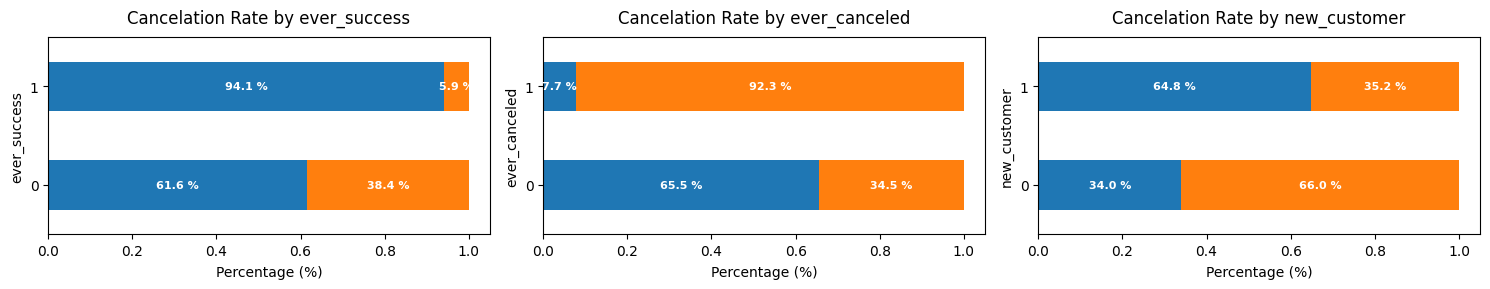

In [253]:
columns_to_plot = ['ever_success','ever_canceled', 'new_customer']
stack_bar_chart(columns_to_plot)

### is_weekend, and arrival
* is_weekend untuk mengetahui apakah pelanggan banyak booking untuk menginap di akhir pekan atau hari kerja
* arrival_day untuk mengetahui hari apa saja pelanggan akan menginap

In [254]:
# Menggabungkan kolom-kolom menjadi satu kolom datetime
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str), errors='coerce')
df.dropna(inplace=True)

In [255]:
# is_weekend
df['is_weekend'] = df['arrival_date'].dt.dayofweek.isin([5, 6]).astype(int) # 1 untuk akhir pekan, 0 untuk hari kerja
df['is_weekend'].value_counts()

# arrival_day
df['arrival_day'] = df['arrival_date'].dt.day_name()

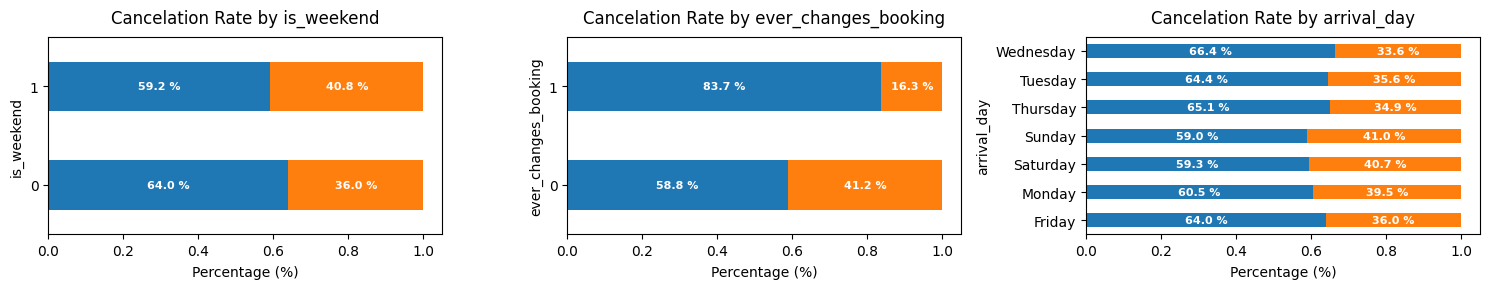

In [256]:
columns_to_plot = ['is_weekend', 'ever_changes_booking','arrival_day']
stack_bar_chart(columns_to_plot)

In [257]:
df['arrival_date'].describe()

C:\Users\ramad\AppData\Local\Temp\ipykernel_23724\1709966627.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['arrival_date'].describe()


count                   81325
unique                    792
top       2017-12-05 00:00:00
freq                      303
first     2017-07-01 00:00:00
last      2019-08-31 00:00:00
Name: arrival_date, dtype: object

### replace country with rate cancelation from each country

In [258]:
cancelation_rates = df.groupby('country')['is_canceled'].mean().reset_index()
cancelation_rates.rename(columns={'is_canceled': 'cancelation_rate'}, inplace=True)

# Buat kamus yang memetakan negara ke tingkat pembatalan
country_to_cancelation = dict(zip(cancelation_rates['country'], cancelation_rates['cancelation_rate']))

# Ganti nilai-nilai dalam kolom 'country' dengan tingkat pembatalan yang baru
df['country'] = df['country'].map(country_to_cancelation)

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81325 entries, 0 to 83292
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           81325 non-null  object        
 1   is_canceled                     81325 non-null  int64         
 2   lead_time                       81325 non-null  int64         
 3   arrival_date_year               81325 non-null  int64         
 4   arrival_date_month              81325 non-null  object        
 5   arrival_date_week_number        81325 non-null  int64         
 6   arrival_date_day_of_month       81325 non-null  int64         
 7   stays_in_weekend_nights         81325 non-null  int64         
 8   stays_in_week_nights            81325 non-null  int64         
 9   adults                          81325 non-null  int64         
 10  children                        81325 non-null  int32         
 11  ba

### Lead Time Month

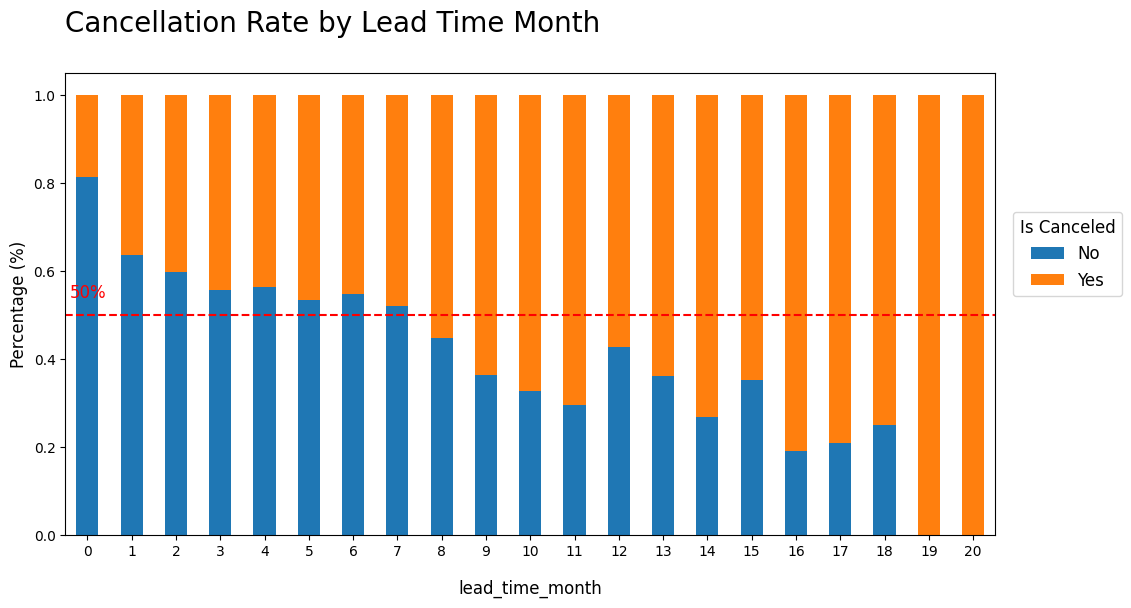

In [260]:
df['lead_time_month'] = df['lead_time'] // 30

df_sorted = df.sort_values(by='lead_time_month')
# Plotting
lead_time_month_ax = pd.crosstab(df_sorted['lead_time_month'], df_sorted['is_canceled'], normalize='index').plot.bar(stacked=True, figsize=(12, 6))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No', 'Yes'], loc='lower left')

plt.axhline(y=0.5, color='red', linestyle='--')
plt.text(-0.4, 0.54, '50%', color='red', fontsize=12)

lead_time_month_ax.set_xticks(range(len(df_sorted['lead_time_month'].unique())))
lead_time_month_ax.set_xticklabels(df_sorted['lead_time_month'].unique())

plt.title('Cancellation Rate by Lead Time Month', fontsize=20, pad=30, loc='left')
lead_time_month_ax.set_xticklabels(df_sorted['lead_time_month'].unique(), rotation=360)  # Atur label sesuai dengan data aktual
plt.xlabel('lead_time_month', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

## colom to drop

In [262]:
df1 = df.drop(columns=['reservation_status_date','hotel','agent','bookingID',
                 'reservation_status','arrival_date', 'children','babies',
                 'stays_in_weekend_nights','stays_in_week_nights','lead_time_month',
                 'new_customer', 'required_car_parking_spaces']).copy()

In [263]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81325 entries, 0 to 83292
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     81325 non-null  int64  
 1   lead_time                       81325 non-null  int64  
 2   arrival_date_year               81325 non-null  int64  
 3   arrival_date_month              81325 non-null  object 
 4   arrival_date_week_number        81325 non-null  int64  
 5   arrival_date_day_of_month       81325 non-null  int64  
 6   adults                          81325 non-null  int64  
 7   meal                            81325 non-null  object 
 8   country                         81325 non-null  float64
 9   market_segment                  81325 non-null  object 
 10  distribution_channel            81325 non-null  object 
 11  is_repeated_guest               81325 non-null  int64  
 12  previous_cancellations          

In [264]:
joblib.dump(df1, PATH_DATA_CLEAN+'modeling_data.pkl')

['../Dataset/Clean/modeling_data.pkl']